 <a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 300, align = "center"></a>

<h1 align=center><font size = 100>Business Consulting Making Decisions</font></h1>


# Background:

We are business consulting agency work with business owners on developing a business plan, identifying marketing needs and help in making decisions

# Pharmacies chain stores in the United States

The number of community pharmacies increased by 6.3%, from 63,752 pharmacies in 2007 to 67,753 pharmacies in 2015
The top 25 pharmacy chain stores represent about 28,000 pharmacy locations in the U.S. and employ about 46,000 on-staff pharmacists

# The problem:

One of our clients is a large drug company and want to buy one of pharmacies chain stores in the United States.
Therefore, we will provided him with statics about pharmacies chain stores .
In addition, help him to make his decisions

# Data:

# i. Wikipedia Data

The most top five states. Texas, New York, Florida ,
Pennsylvania and California round out for pharmacy chain information in the united state.
https://en.wikipedia.org/wiki/Pharmacies_in_the_United_States

# ii. Foursquare API


I queried Foursquare API in order find venues that are most popular in each Pharmacies in the United States
Pharmacy rate, latitude and longitude of each pharmacy
In order to determine which pharmacy chain is the best for our clients.

# iii. Csv file:


Top U.S. pharmacies ranked by prescription drugs market share in 2019:

https://www.statista.com/statistics/734171/pharmacies-ranked-by-rx-market-share-in-us/

Pharmacy and drug store sales in the United States from 1992 to 2018 (in billion U.S. dollars):

https://www.statista.com/statistics/197635/annual-pharmacies-and-drug-store-sales-in-the-us-since-1992/

#  part one

## Importing the required Libraries

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import types
import csv
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print('Libraries imported.')

Libraries imported.


In [2]:
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
print('Libraries imported.')

Libraries imported.


In [3]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
print('Libraries imported.')

Libraries imported.


In [4]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
print('Libraries imported.')

Libraries imported.


In [5]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
print('Libraries imported.')

Libraries imported.


In [6]:
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
print('Libraries imported.')

Libraries imported.


In [7]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


# Explore Dataset "csv_file"

In [8]:
# The code was removed by Watson Studio for sharing.

,Rank,Pharmacy_Chains,City,State,Pharmacists,Store(s)
0,1,CVS Pharmacy,Woonsocket,RI,24000,9700
1,2,Walgreens,Deerfield,IL,10578,8232
2,3,Walmart Stores Inc,Bentonville,AR,6358,3646
3,4,Rite Aid Corporation,Camp Hill,PA,5523,4608
4,5,Kroger Company,Cincinnati,OH,1866,1156
5,6,Target Corporation now CVS Pharmacy,Minneapolis,MN,1436,1672
6,7,Kaiser Permanente (HMO),Oakland,CA,1298,290
7,8,Sears Holdings Corporation,Hoffman Estates,IL,1169,1002
8,9,Medicine Shoppe International,Earth City,MO,943,564
9,10,Dominick's Finer Foods,Pleasanton,CA,888,719


# Pharmacy Chains: the upper table shows us the number of Pharmacists and Store(s) for each Pharmacy Chains

### Source Wikipedia

In [9]:
body = client_fe6dea583e444f2bb9af2027514c329c.get_object(Bucket='ibmdatascienceprofessionalcertifi-donotdelete-pr-gfkbryzli5uo46',Key='market_share.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_Pharmacy_share = pd.read_csv(body)
df_Pharmacy_share


,Rank,Pharmacy_Chains,share
0,1,CVS Pharmacy,24.5
1,2,Walgreens,18.9
2,3,"Cigna/Express Scripts, Inc.",10.3
3,4,UnitedHealth Group (OptumRx),5.8
4,5,Walmart Stores Inc,4.7
5,6,Kroger Company,3.1
6,7,Rite Aid Corporation,2.5
7,8,Humana Pharmacy Solutions,1.5
8,9,Albertsons Companies,1.2
9,10,Diplomat Pharmacy,1.0


# Pharmacy_share :the upper table shows us the Top U.S. pharmacies ranked by prescription drugs market share in 2019

### Source Drug Channels Institute


In [10]:
body = client_fe6dea583e444f2bb9af2027514c329c.get_object(Bucket='ibmdatascienceprofessionalcertifi-donotdelete-pr-gfkbryzli5uo46',Key='Pharmacy_sales.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_Pharmacy_sales = pd.read_csv(body)
df_Pharmacy_sales


,year,sales(in billion U.S. dollars)
0,1992,77.79
1,1993,79.71
2,1994,81.99
3,1995,85.84
4,1996,91.81
5,1997,98.82
6,1998,108.42
7,1999,121.28
8,2000,130.86
9,2001,141.77


# Pharmacy_sales :the upper table show us Pharmacy and drug store sales in the United States from 1992 to 2018 (in billion U.S. dollars)

### Source US Census Bureau

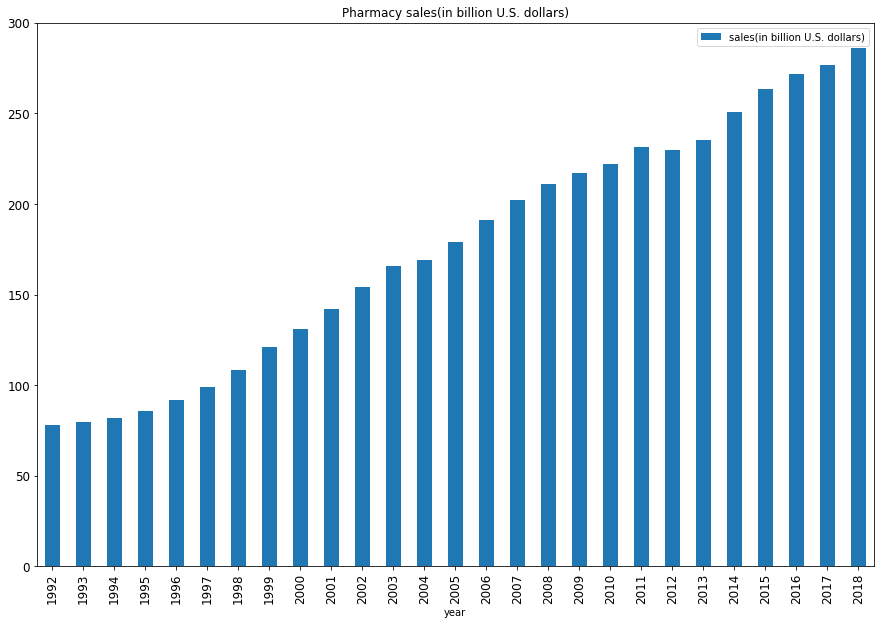

In [11]:
df_Pharmacy_sales.plot(x ='year', y='sales(in billion U.S. dollars)', kind = 'bar', figsize=(15, 10), legend=True, fontsize=12)
plt.title('Pharmacy sales(in billion U.S. dollars)')
plt.show()


In [12]:
df_merge = pd.merge(df_Pharmacy_Chains, df_Pharmacy_share ,on='Pharmacy_Chains')
df_merge.index = ['CVS Pharmacy', 'Walgreens', 'Walmart Stores Inc', 'Rite Aid Corporation', 'Kroger Company','Costco Pharmacies']
df_merge.drop_duplicates(inplace=True)
df_merge

,Rank_x,Pharmacy_Chains,City,State,Pharmacists,Store(s),Rank_y,share
CVS Pharmacy,1,CVS Pharmacy,Woonsocket,RI,24000,9700,1,24.5
Walgreens,2,Walgreens,Deerfield,IL,10578,8232,2,18.9
Walmart Stores Inc,3,Walmart Stores Inc,Bentonville,AR,6358,3646,5,4.7
Rite Aid Corporation,4,Rite Aid Corporation,Camp Hill,PA,5523,4608,7,2.5
Kroger Company,5,Kroger Company,Cincinnati,OH,1866,1156,6,3.1
Costco Pharmacies,12,Costco Pharmacies,Issaquah,WA,589,323,13,0.6


In [13]:
df_merge.rename(columns={'Rank_x':'Rank'},inplace=True)
df_merge.drop(['Rank_y'],axis=1,inplace=True)
df_merge

,Rank,Pharmacy_Chains,City,State,Pharmacists,Store(s),share
CVS Pharmacy,1,CVS Pharmacy,Woonsocket,RI,24000,9700,24.5
Walgreens,2,Walgreens,Deerfield,IL,10578,8232,18.9
Walmart Stores Inc,3,Walmart Stores Inc,Bentonville,AR,6358,3646,4.7
Rite Aid Corporation,4,Rite Aid Corporation,Camp Hill,PA,5523,4608,2.5
Kroger Company,5,Kroger Company,Cincinnati,OH,1866,1156,3.1
Costco Pharmacies,12,Costco Pharmacies,Issaquah,WA,589,323,0.6


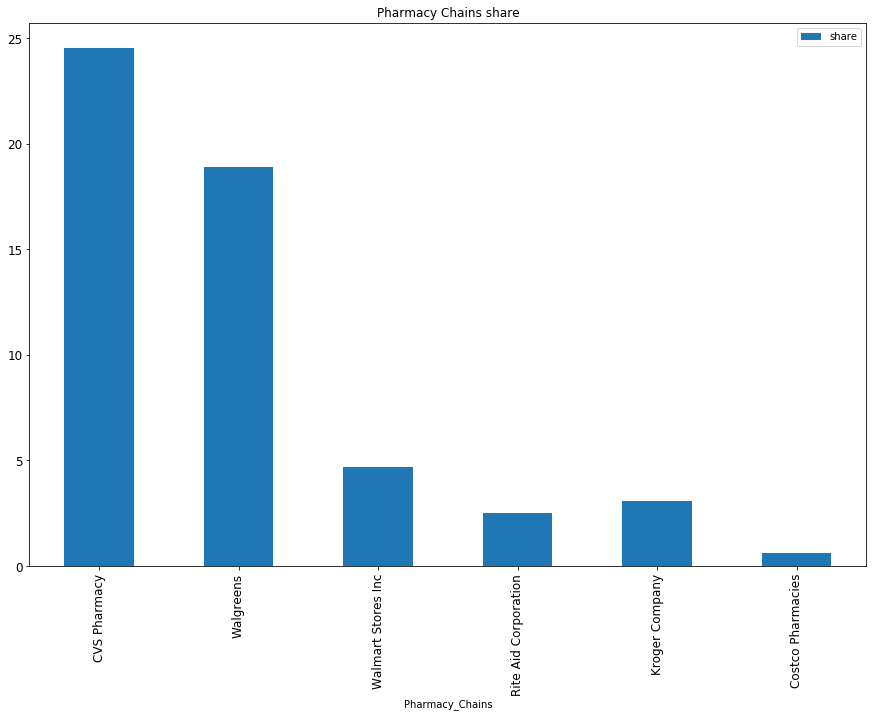

In [14]:
df_merge.plot(x ='Pharmacy_Chains', y='share', kind = 'bar', figsize=(15, 10), legend=True, fontsize=12)
plt.title('Pharmacy Chains share')
plt.show()

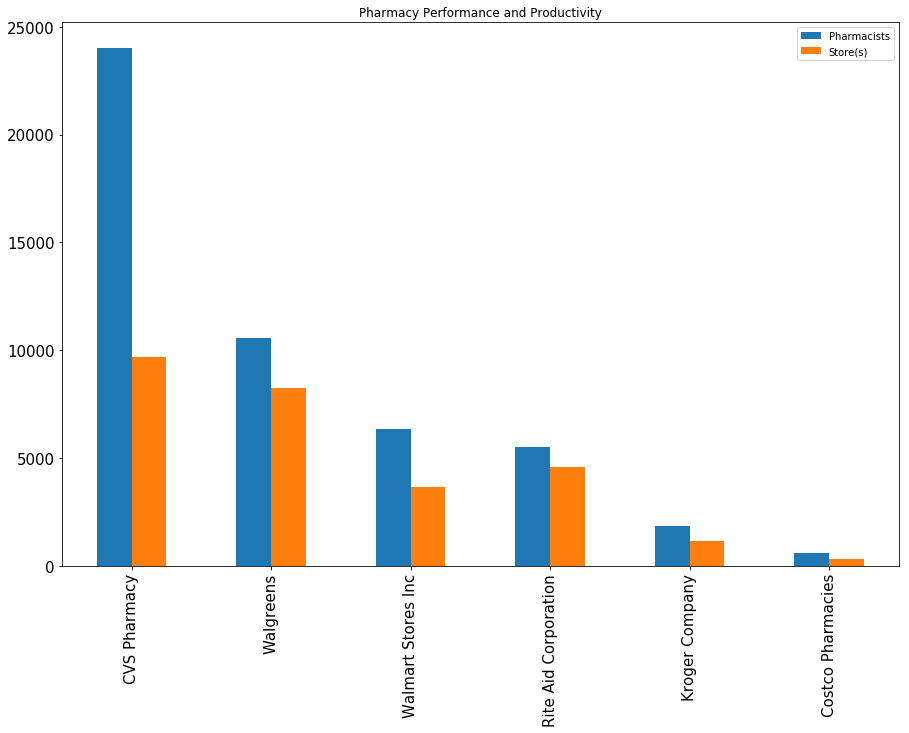

In [15]:
ax = df_merge[['Pharmacists','Store(s)']].plot(kind='bar', figsize=(15, 10), legend=True, fontsize=15)
plt.title("Pharmacy Performance and Productivity")
plt.show()

# New York, NY, United States

# generate map centred around the Capital Albany

# Define Foursquare Credentials and Version

In [16]:
CLIENT_ID = '3RBY2OSAVIWOQUIME4SKLNWREIFBY0BXPTNINRETPMLRGUTR'#'your-client-ID' # your Foursquare ID
CLIENT_SECRET = 'I0UQN2TVWRUXXMWCRC5MBVSO4FMJNC0M1JHKLLWWNBRTPMS3'#'your-client-secret' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 6000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3RBY2OSAVIWOQUIME4SKLNWREIFBY0BXPTNINRETPMLRGUTR
CLIENT_SECRET:I0UQN2TVWRUXXMWCRC5MBVSO4FMJNC0M1JHKLLWWNBRTPMS3


#### Let's again assume that we are staying at the New York So let's start by converting the Pharmacy Chains's address to its latitude and longitude coordinates.

In [17]:
address = 'New York, NY, United States'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.7127281 -74.0060152


## 1. Search for a specific venue category
> `https://api.foursquare.com/v2/venues/`**search**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&query=`**QUERY**`&radius=`**RADIUS**`&limit=`**LIMIT**

####  let's define a query to search for Pharmacy Chains's that is within 100,000 metres radius in New York. 

In [18]:
search_query = 'pharmacy'
radius = 100000
print(search_query + ' .... OK!')

pharmacy .... OK!


#### Define the corresponding URL

In [19]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=3RBY2OSAVIWOQUIME4SKLNWREIFBY0BXPTNINRETPMLRGUTR&client_secret=I0UQN2TVWRUXXMWCRC5MBVSO4FMJNC0M1JHKLLWWNBRTPMS3&ll=40.7127281,-74.0060152&v=20180604&query=pharmacy&radius=100000&limit=6000'

In [20]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e9143b669babe001b7f5ead'},
 'response': {'venues': [{'id': '4b4a5eb9f964a5209a8526e3',
    'name': 'CVS pharmacy',
    'location': {'address': '129 Fulton St',
     'crossStreet': 'at Nassau St',
     'lat': 40.710336759003376,
     'lng': -74.00760191419336,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.710336759003376,
       'lng': -74.00760191419336}],
     'distance': 297,
     'postalCode': '10038',
     'cc': 'US',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['129 Fulton St (at Nassau St)',
      'New York, NY 10038',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d10f951735',
      'name': 'Pharmacy',
      'pluralName': 'Pharmacies',
      'shortName': 'Pharmacy',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/pharmacy_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1586578445',
    'hasPerk': Fal

#### Get relevant part of JSON and transform it into a *pandas* dataframe

In [21]:
venues = results['response']['venues']
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4b4a5eb9f964a5209a8526e3,129 Fulton St,US,New York,United States,at Nassau St,297,"[129 Fulton St (at Nassau St), New York, NY 10...","[{'label': 'display', 'lat': 40.71033675900337...",40.710337,-74.007602,10038,NY,CVS pharmacy,v-1586578445
1,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,3fd66200f964a5208be61ee3,5 Hudson St,US,New York,United States,NaN,438,"[5 Hudson St, New York, NY 10013, United States]","[{'label': 'display', 'lat': 40.715822, 'lng':...",40.715822,-74.009238,10013,NY,Kings Pharmacy,v-1586578445
2,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,535f189e498efaba1e53221c,298 Mulberry St,US,New York,United States,NaN,1664,"[298 Mulberry St, New York, NY 10012, United S...","[{'label': 'display', 'lat': 40.72493610212003...",40.724936,-73.994622,10012,NY,CVS pharmacy,v-1586578445
3,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4add27e4f964a520586421e3,253 1st Ave,US,New York,United States,at E 15th St,2919,"[253 1st Ave (at E 15th St), New York, NY 1000...","[{'label': 'display', 'lat': 40.73193159836280...",40.731932,-73.982441,10003,NY,CVS pharmacy,v-1586578445
4,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4aede6d5f964a52008d021e3,158 Bleecker St,US,New York,United States,at Thompson St.,1826,"[158 Bleecker St (at Thompson St.), New York, ...","[{'label': 'display', 'lat': 40.72846178636195...",40.728462,-73.999884,10012,NY,CVS pharmacy,v-1586578445


In [22]:
dataframe.shape

(50, 17)

#### Define information of interest and filter dataframe

In [23]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,CVS pharmacy,Pharmacy,129 Fulton St,US,New York,United States,at Nassau St,297,"[129 Fulton St (at Nassau St), New York, NY 10...","[{'label': 'display', 'lat': 40.71033675900337...",40.710337,-74.007602,10038,NY,4b4a5eb9f964a5209a8526e3
1,Kings Pharmacy,Pharmacy,5 Hudson St,US,New York,United States,NaN,438,"[5 Hudson St, New York, NY 10013, United States]","[{'label': 'display', 'lat': 40.715822, 'lng':...",40.715822,-74.009238,10013,NY,3fd66200f964a5208be61ee3
2,CVS pharmacy,Pharmacy,298 Mulberry St,US,New York,United States,NaN,1664,"[298 Mulberry St, New York, NY 10012, United S...","[{'label': 'display', 'lat': 40.72493610212003...",40.724936,-73.994622,10012,NY,535f189e498efaba1e53221c
3,CVS pharmacy,Pharmacy,253 1st Ave,US,New York,United States,at E 15th St,2919,"[253 1st Ave (at E 15th St), New York, NY 1000...","[{'label': 'display', 'lat': 40.73193159836280...",40.731932,-73.982441,10003,NY,4add27e4f964a520586421e3
4,CVS pharmacy,Pharmacy,158 Bleecker St,US,New York,United States,at Thompson St.,1826,"[158 Bleecker St (at Thompson St.), New York, ...","[{'label': 'display', 'lat': 40.72846178636195...",40.728462,-73.999884,10012,NY,4aede6d5f964a52008d021e3
5,CVS Pharmacy,Pharmacy,51 Astor Pl,US,New York,United States,at Cooper Sq.,2302,"[51 Astor Pl (at Cooper Sq.), New York, NY 100...","[{'label': 'display', 'lat': 40.72980824872139...",40.729808,-73.990626,10003,NY,5678271c498ed123ac7fc1e0
6,CVS pharmacy,Pharmacy,156 Henry St,US,Brooklyn,United States,Love Ln,2111,"[156 Henry St (Love Ln), Brooklyn, NY 11201, U...","[{'label': 'display', 'lat': 40.69606622751908...",40.696066,-73.994062,11201,NY,4af231faf964a5207de621e3
7,Downtown Pharmacy,Pharmacy,373 Broadway,US,New York,United States,White and Franklin,617,"[373 Broadway (White and Franklin), New York, ...","[{'label': 'display', 'lat': 40.717963, 'lng':...",40.717963,-74.003593,10013,NY,4bdc451563c5c9b696fe2a68
8,ABC Pharmacy / AID Pharmacy,Pharmacy,139 Centre St,US,New York,United States,NaN,729,"[139 Centre St, New York, NY 10013, United Sta...","[{'label': 'display', 'lat': 40.71759894980997...",40.717599,-74.000237,10013,NY,50282de1e4b06553e2cd0c5c
9,ABC Pharmacy,Pharmacy,101 Lafayette St,US,New York,United States,btw Walker & White Street,732,"[101 Lafayette St (btw Walker & White Street),...","[{'label': 'display', 'lat': 40.71758966363180...",40.717590,-74.000159,10013,NY,4fafc0d2e4b0e047b275fd8a


#### Let's visualize the  Pharmacy Chains's that is within 100000 metres radius in New York. 

In [24]:
dataframe_filtered.name

0                                  CVS pharmacy
1                                Kings Pharmacy
2                                  CVS pharmacy
3                                  CVS pharmacy
4                                  CVS pharmacy
5                                  CVS Pharmacy
6                                  CVS pharmacy
7                             Downtown Pharmacy
8                   ABC Pharmacy / AID Pharmacy
9                                  ABC Pharmacy
10                            Buy Rite Pharmacy
11                                 CVS pharmacy
12                                 CVS pharmacy
13                         Bayard L.C. Pharmacy
14                                 CVS pharmacy
15                                 CVS pharmacy
16                                 CVS pharmacy
17                                 CVS pharmacy
18                                 CVS pharmacy
19                                 CVS pharmacy
20    ABC Pharmacy ; First Pharmaceutica

In [25]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Capital Albany

# add a red circle marker to represent Albany Capital
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Albany',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

# Florida, FL, United States

# generate map centred around  the Capital Tallahassee

# Define Foursquare Credentials and Version

In [26]:
CLIENT_ID = '3RBY2OSAVIWOQUIME4SKLNWREIFBY0BXPTNINRETPMLRGUTR'#'your-client-ID' # your Foursquare ID
CLIENT_SECRET = 'I0UQN2TVWRUXXMWCRC5MBVSO4FMJNC0M1JHKLLWWNBRTPMS3'#'your-client-secret' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 6000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3RBY2OSAVIWOQUIME4SKLNWREIFBY0BXPTNINRETPMLRGUTR
CLIENT_SECRET:I0UQN2TVWRUXXMWCRC5MBVSO4FMJNC0M1JHKLLWWNBRTPMS3


#### Let's again assume that we are staying at the Florida So let's start by converting the Pharmacy Chains's address to its latitude and longitude coordinates.

In [27]:
address = 'Florida, FL, United States'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

28.5421109 -81.3790304


## 1. Search for a specific venue category
> `https://api.foursquare.com/v2/venues/`**search**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&query=`**QUERY**`&radius=`**RADIUS**`&limit=`**LIMIT**

####  let's define a query to search for Pharmacy Chains's that is within 100,000 metres radius in Florida. 

In [28]:
search_query = 'pharmacy'
radius = 100000
print(search_query + ' .... OK!')

pharmacy .... OK!


#### Define the corresponding URL

In [29]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=3RBY2OSAVIWOQUIME4SKLNWREIFBY0BXPTNINRETPMLRGUTR&client_secret=I0UQN2TVWRUXXMWCRC5MBVSO4FMJNC0M1JHKLLWWNBRTPMS3&ll=28.5421109,-81.3790304&v=20180604&query=pharmacy&radius=100000&limit=6000'

In [30]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e91438d0f596800262e9208'},
 'response': {'venues': [{'id': '4b8ec366f964a520ad3533e3',
    'name': 'CVS pharmacy',
    'location': {'address': '1201 E Colonial Dr',
     'crossStreet': 'at Mills Ave.',
     'lat': 28.553331319259154,
     'lng': -81.3639727362699,
     'labeledLatLngs': [{'label': 'display',
       'lat': 28.553331319259154,
       'lng': -81.3639727362699},
      {'label': '?', 'lat': 28.553282, 'lng': -81.364224}],
     'distance': 1930,
     'postalCode': '32803',
     'cc': 'US',
     'city': 'Orlando',
     'state': 'FL',
     'country': 'United States',
     'formattedAddress': ['1201 E Colonial Dr (at Mills Ave.)',
      'Orlando, FL 32803',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d10f951735',
      'name': 'Pharmacy',
      'pluralName': 'Pharmacies',
      'shortName': 'Pharmacy',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/pharmacy_',
       'suffix': '.png'},
      'pr

#### Get relevant part of JSON and transform it into a *pandas* dataframe

In [31]:
venues = results['response']['venues']
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4b8ec366f964a520ad3533e3,1201 E Colonial Dr,US,Orlando,United States,at Mills Ave.,1930,"[1201 E Colonial Dr (at Mills Ave.), Orlando, ...","[{'label': 'display', 'lat': 28.55333131925915...",28.553331,-81.363973,32803,FL,CVS pharmacy,v-1586578491
1,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4b59ad1af964a5202c9228e3,2702 S Orange Ave,US,Orlando,United States,at Michigan St.,3296,"[2702 S Orange Ave (at Michigan St.), Orlando,...","[{'label': 'display', 'lat': 28.51257323364539...",28.512573,-81.376670,32806,FL,CVS pharmacy,v-1586578491
2,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4b8aea61f964a520e68832e3,2201 Edgewater Dr,US,Orlando,United States,at Princeton St,3412,"[2201 Edgewater Dr (at Princeton St), Orlando,...","[{'label': 'display', 'lat': 28.57143219684886...",28.571432,-81.389198,32804,FL,CVS pharmacy,v-1586578491
3,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4b450d62f964a520980226e3,4801 New Broad St,US,Orlando,United States,at Meeting St.,5697,"[4801 New Broad St (at Meeting St.), Orlando, ...","[{'label': 'display', 'lat': 28.56676352987119...",28.566764,-81.327961,32814,FL,CVS pharmacy,v-1586578491
4,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4b9b9ab6f964a520f11236e3,7599 W Sand Lake Rd,US,Orlando,United States,NaN,14666,"[7599 W Sand Lake Rd, Orlando, FL 32819, Unite...","[{'label': 'display', 'lat': 28.45067525331465...",28.450675,-81.486962,32819,FL,CVS pharmacy,v-1586578491


In [32]:
dataframe.shape

(50, 17)

#### Define information of interest and filter dataframe

In [33]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,CVS pharmacy,Pharmacy,1201 E Colonial Dr,US,Orlando,United States,at Mills Ave.,1930,"[1201 E Colonial Dr (at Mills Ave.), Orlando, ...","[{'label': 'display', 'lat': 28.55333131925915...",28.553331,-81.363973,32803,FL,4b8ec366f964a520ad3533e3
1,CVS pharmacy,Pharmacy,2702 S Orange Ave,US,Orlando,United States,at Michigan St.,3296,"[2702 S Orange Ave (at Michigan St.), Orlando,...","[{'label': 'display', 'lat': 28.51257323364539...",28.512573,-81.376670,32806,FL,4b59ad1af964a5202c9228e3
2,CVS pharmacy,Pharmacy,2201 Edgewater Dr,US,Orlando,United States,at Princeton St,3412,"[2201 Edgewater Dr (at Princeton St), Orlando,...","[{'label': 'display', 'lat': 28.57143219684886...",28.571432,-81.389198,32804,FL,4b8aea61f964a520e68832e3
3,CVS pharmacy,Pharmacy,4801 New Broad St,US,Orlando,United States,at Meeting St.,5697,"[4801 New Broad St (at Meeting St.), Orlando, ...","[{'label': 'display', 'lat': 28.56676352987119...",28.566764,-81.327961,32814,FL,4b450d62f964a520980226e3
4,CVS pharmacy,Pharmacy,7599 W Sand Lake Rd,US,Orlando,United States,NaN,14666,"[7599 W Sand Lake Rd, Orlando, FL 32819, Unite...","[{'label': 'display', 'lat': 28.45067525331465...",28.450675,-81.486962,32819,FL,4b9b9ab6f964a520f11236e3
5,CVS pharmacy,Pharmacy,5300 S John Young Pkwy,US,Orlando,United States,at Conroy Rd,7267,"[5300 S John Young Pkwy (at Conroy Rd), Orland...","[{'label': 'display', 'lat': 28.48647430757704...",28.486474,-81.417898,32839,FL,4bba0f723db7b71328d5229a
6,CVS pharmacy,Pharmacy,7300 Curry Ford Rd,US,Orlando,United States,at S Goldenrod Rd,9289,"[7300 Curry Ford Rd (at S Goldenrod Rd), Orlan...","[{'label': 'display', 'lat': 28.51480320315775...",28.514803,-81.289275,32822,FL,4b985dfff964a5205d3e35e3
7,CVS pharmacy,Pharmacy,3502 Edgewater Dr,US,Orlando,United States,NaN,4841,"[3502 Edgewater Dr, Orlando, FL 32804, United ...","[{'label': 'display', 'lat': 28.58402440993565...",28.584024,-81.392250,32804,FL,4b8aeb9af964a520358932e3
8,CVS pharmacy,Pharmacy,3212 Curry Ford Rd,US,Orlando,United States,NaN,4109,"[3212 Curry Ford Rd, Orlando, FL 32806, United...","[{'label': 'display', 'lat': 28.52396429064118...",28.523964,-81.342432,32806,FL,4bd52c896798ef3bf30c638d
9,CVS pharmacy,Pharmacy,7996 Conroy Windermere Rd,US,Orlando,United States,Dr Philips Blvd,12256,"[7996 Conroy Windermere Rd (Dr Philips Blvd), ...","[{'label': 'display', 'lat': 28.49338360636858...",28.493384,-81.491396,32835,FL,4b65fd2df964a520d60c2be3


#### Let's visualize the  Pharmacy Chains's that is within 100,000 metres radius in Florida. 

In [34]:
dataframe_filtered.name

0                     CVS pharmacy
1                     CVS pharmacy
2                     CVS pharmacy
3                     CVS pharmacy
4                     CVS pharmacy
5                     CVS pharmacy
6                     CVS pharmacy
7                     CVS pharmacy
8                     CVS pharmacy
9                     CVS pharmacy
10                    CVS pharmacy
11                    CVS pharmacy
12                    CVS pharmacy
13                    CVS pharmacy
14                    CVS/pharmacy
15                    CVS pharmacy
16                    CVS pharmacy
17                    CVS pharmacy
18                    CVS pharmacy
19                    CVS pharmacy
20                    CVS pharmacy
21                    CVS pharmacy
22                    CVS pharmacy
23                    CVS pharmacy
24                    CVS pharmacy
25                    CVS pharmacy
26                    CVS pharmacy
27    Olympia Compounding Pharmacy
28                  

In [35]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around  the Capital Tallahassee

# add a red circle marker to represent the Capital Tallahassee
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Tallahassee',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

# Illinois ,IL, United States

# generate map centred around the Capital Springfield 

# Define Foursquare Credentials and Version

In [36]:
CLIENT_ID = '3RBY2OSAVIWOQUIME4SKLNWREIFBY0BXPTNINRETPMLRGUTR'#'your-client-ID' # your Foursquare ID
CLIENT_SECRET = 'I0UQN2TVWRUXXMWCRC5MBVSO4FMJNC0M1JHKLLWWNBRTPMS3'#'your-client-secret' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 6000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3RBY2OSAVIWOQUIME4SKLNWREIFBY0BXPTNINRETPMLRGUTR
CLIENT_SECRET:I0UQN2TVWRUXXMWCRC5MBVSO4FMJNC0M1JHKLLWWNBRTPMS3


#### Let's again assume that we are staying at the Illinois So let's start by converting the Pharmacy Chains's address to its latitude and longitude coordinates.

In [37]:
address = 'Illinois ,IL, United States'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.0796606 -89.4337288


## 1. Search for a specific venue category
> `https://api.foursquare.com/v2/venues/`**search**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&query=`**QUERY**`&radius=`**RADIUS**`&limit=`**LIMIT**

####  let's define a query to search for Pharmacy Chains's that is within 100,000 metres radius in Illinois. 

In [38]:
search_query = 'pharmacy'
radius = 100000
print(search_query + ' .... OK!')

pharmacy .... OK!


#### Define the corresponding URL

In [39]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=3RBY2OSAVIWOQUIME4SKLNWREIFBY0BXPTNINRETPMLRGUTR&client_secret=I0UQN2TVWRUXXMWCRC5MBVSO4FMJNC0M1JHKLLWWNBRTPMS3&ll=40.0796606,-89.4337288&v=20180604&query=pharmacy&radius=100000&limit=6000'

In [40]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e9144fa5fb726001bd1b296'},
 'response': {'venues': [{'id': '4b83139ff964a5202cf630e3',
    'name': 'CVS pharmacy',
    'location': {'address': '534 Woodlawn Rd',
     'crossStreet': 'Woodlawn',
     'lat': 40.15803038264463,
     'lng': -89.3746952233213,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.15803038264463,
       'lng': -89.3746952233213}],
     'distance': 10067,
     'postalCode': '62656',
     'cc': 'US',
     'city': 'Lincoln',
     'state': 'IL',
     'country': 'United States',
     'formattedAddress': ['534 Woodlawn Rd (Woodlawn)',
      'Lincoln, IL 62656',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d10f951735',
      'name': 'Pharmacy',
      'pluralName': 'Pharmacies',
      'shortName': 'Pharmacy',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/pharmacy_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1586578528',
    'hasPerk': False},
   

#### Get relevant part of JSON and transform it into a *pandas* dataframe

In [41]:
venues = results['response']['venues']
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4b83139ff964a5202cf630e3,534 Woodlawn Rd,US,Lincoln,United States,Woodlawn,10067,"[534 Woodlawn Rd (Woodlawn), Lincoln, IL 62656...","[{'label': 'display', 'lat': 40.15803038264463...",40.158030,-89.374695,62656,IL,CVS pharmacy,v-1586578528,NaN
1,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,50db4753e4b06e4a18dfd657,NaN,US,Lincoln,United States,NaN,9849,"[Lincoln, IL 62656, United States]","[{'label': 'display', 'lat': 40.15737, 'lng': ...",40.157370,-89.378397,62656,IL,Stacey's Pharmacy,v-1586578528,NaN
2,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,551c1112498e6d869617b3ce,825 Malerich Dr,US,Lincoln,United States,NaN,9164,"[825 Malerich Dr, Lincoln, IL 62656, United St...","[{'label': 'display', 'lat': 40.15687, 'lng': ...",40.156870,-89.396370,62656,IL,Walmart Pharmacy,v-1586578528,NaN
3,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4d3da39214aa8cfaf864b55e,1275 N 7th St,US,Riverton,United States,NaN,25810,"[1275 N 7th St, Riverton, IL 62561, United Sta...","[{'label': 'display', 'lat': 39.86280379999999...",39.862804,-89.540796,62561,IL,Curry's Family Pharmacy Inc.,v-1586578528,NaN
4,"[{'id': '4bf58dd8d48988d1e2931735', 'name': 'A...",False,4edc17d38b8173160e62c10f,711 S 5th St,US,Springfield,United States,at Cook St,37787,"[711 S 5th St (at Cook St), Springfield, IL 62...","[{'label': 'display', 'lat': 39.78725359317391...",39.787254,-89.658574,62703,IL,The Pharmacy Gallery & Art Space,v-1586578528,NaN


In [42]:
dataframe.shape

(50, 18)

#### Define information of interest and filter dataframe

In [43]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,CVS pharmacy,Pharmacy,534 Woodlawn Rd,US,Lincoln,United States,Woodlawn,10067,"[534 Woodlawn Rd (Woodlawn), Lincoln, IL 62656...","[{'label': 'display', 'lat': 40.15803038264463...",40.158030,-89.374695,62656,IL,4b83139ff964a5202cf630e3
1,Stacey's Pharmacy,Pharmacy,NaN,US,Lincoln,United States,NaN,9849,"[Lincoln, IL 62656, United States]","[{'label': 'display', 'lat': 40.15737, 'lng': ...",40.157370,-89.378397,62656,IL,50db4753e4b06e4a18dfd657
2,Walmart Pharmacy,Pharmacy,825 Malerich Dr,US,Lincoln,United States,NaN,9164,"[825 Malerich Dr, Lincoln, IL 62656, United St...","[{'label': 'display', 'lat': 40.15687, 'lng': ...",40.156870,-89.396370,62656,IL,551c1112498e6d869617b3ce
3,Curry's Family Pharmacy Inc.,Pharmacy,1275 N 7th St,US,Riverton,United States,NaN,25810,"[1275 N 7th St, Riverton, IL 62561, United Sta...","[{'label': 'display', 'lat': 39.86280379999999...",39.862804,-89.540796,62561,IL,4d3da39214aa8cfaf864b55e
4,The Pharmacy Gallery & Art Space,Art Gallery,711 S 5th St,US,Springfield,United States,at Cook St,37787,"[711 S 5th St (at Cook St), Springfield, IL 62...","[{'label': 'display', 'lat': 39.78725359317391...",39.787254,-89.658574,62703,IL,4edc17d38b8173160e62c10f
5,Stacys' Family Pharmacy,Office,NaN,US,NaN,United States,NaN,17279,"[Illinois, United States]","[{'label': 'display', 'lat': 40.19858266352488...",40.198583,-89.303226,NaN,Illinois,51801a81498eab9b5620ddd2
6,CVS pharmacy,Pharmacy,211 E Carpenter St,US,Springfield,United States,2nd st,35578,"[211 E Carpenter St (2nd st), Springfield, IL ...","[{'label': 'display', 'lat': 39.80770115808629...",39.807701,-89.652720,62702,IL,4bf5d7649abec9b64dda24e8
7,Schnucks Sangamon Pharmacy,Pharmacy,1911 E Sangamon Ave,US,Springfield,United States,NaN,32179,"[1911 E Sangamon Ave, Springfield, IL 62702, U...","[{'label': 'display', 'lat': 39.832728, 'lng':...",39.832728,-89.629803,62702,IL,59494aaf898bdc07ff829a0e
8,CVS pharmacy,Pharmacy,2001 W Washington St,US,Springfield,United States,at Chatham Rd,37768,"[2001 W Washington St (at Chatham Rd), Springf...","[{'label': 'display', 'lat': 39.8016271633157,...",39.801627,-89.687343,62702,IL,4c530a66479fc92866c5d390
9,Schnucks Springfield Specialty Pharmacy,Pharmacy,2239 E Cook St,US,Springfield,United States,NaN,35523,"[2239 E Cook St, Springfield, IL 62703, United...","[{'label': 'display', 'lat': 39.7952639, 'lng'...",39.795264,-89.622508,62703,IL,59494af03ba76704b8f7279d


#### Let's visualize the  Pharmacy Chains's that is within 5000 metres radius in Illinois. 

In [44]:
dataframe_filtered.name

0                                          CVS pharmacy
1                                     Stacey's Pharmacy
2                                      Walmart Pharmacy
3                          Curry's Family Pharmacy Inc.
4                      The Pharmacy Gallery & Art Space
5                               Stacys' Family Pharmacy
6                                          CVS pharmacy
7                            Schnucks Sangamon Pharmacy
8                                          CVS pharmacy
9               Schnucks Springfield Specialty Pharmacy
10                                         CVS pharmacy
11                                         CVS pharmacy
12                                         CVS pharmacy
13                                         CVS pharmacy
14                                         CVS pharmacy
15    Walgreens Pharmacy at Memorial Medical Center ...
16                                         CVS pharmacy
17                               CVS Pharmacy at

In [45]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Capital Springfield 

# add a red circle marker to represent Springfield Capital
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Springfield',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

# Pennsylvania, PA, United States

# generate map centred around the Capital Harrisburg 



# Define Foursquare Credentials and Version

In [46]:
CLIENT_ID = '3RBY2OSAVIWOQUIME4SKLNWREIFBY0BXPTNINRETPMLRGUTR'#'your-client-ID' # your Foursquare ID
CLIENT_SECRET = 'I0UQN2TVWRUXXMWCRC5MBVSO4FMJNC0M1JHKLLWWNBRTPMS3'#'your-client-secret' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 6000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3RBY2OSAVIWOQUIME4SKLNWREIFBY0BXPTNINRETPMLRGUTR
CLIENT_SECRET:I0UQN2TVWRUXXMWCRC5MBVSO4FMJNC0M1JHKLLWWNBRTPMS3


#### Let's again assume that we are staying at the Pennsylvania So let's start by converting the Pharmacy Chains's address to its latitude and longitude coordinates.

In [47]:
address = 'Pennsylvania, PA, United States'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

30.8713577 -88.0482706


## 1. Search for a specific venue category
> `https://api.foursquare.com/v2/venues/`**search**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&query=`**QUERY**`&radius=`**RADIUS**`&limit=`**LIMIT**

####  let's define a query to search for Pharmacy Chains's that is within 100,000 metres radius in Pennsylvania. 

In [48]:
search_query = 'pharmacy'
radius = 100000
print(search_query + ' .... OK!')

pharmacy .... OK!


#### Define the corresponding URL

In [49]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=3RBY2OSAVIWOQUIME4SKLNWREIFBY0BXPTNINRETPMLRGUTR&client_secret=I0UQN2TVWRUXXMWCRC5MBVSO4FMJNC0M1JHKLLWWNBRTPMS3&ll=30.8713577,-88.0482706&v=20180604&query=pharmacy&radius=100000&limit=6000'

In [50]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e914444ad1ab4001b22de09'},
 'response': {'venues': [{'id': '55f0ad9b498ef0e91c63bac9',
    'name': 'CVS pharmacy',
    'location': {'lat': 30.850653101797057,
     'lng': -88.06574233236135,
     'labeledLatLngs': [{'label': 'display',
       'lat': 30.850653101797057,
       'lng': -88.06574233236135}],
     'distance': 2845,
     'cc': 'US',
     'city': 'Saraland',
     'state': 'AL',
     'country': 'United States',
     'formattedAddress': ['Saraland, AL', 'United States']},
    'categories': [{'id': '4bf58dd8d48988d10f951735',
      'name': 'Pharmacy',
      'pluralName': 'Pharmacies',
      'shortName': 'Pharmacy',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/pharmacy_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1586578575',
    'hasPerk': False},
   {'id': '568ebe80498e0f537fe7ecc2',
    'name': 'Saraland Pharmacy',
    'location': {'address': 'Saraland Loop RD',
     'lat': 30.8248508

#### Get relevant part of JSON and transform it into a *pandas* dataframe

In [51]:
venues = results['response']['venues']
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,55f0ad9b498ef0e91c63bac9,NaN,US,Saraland,United States,NaN,2845,"[Saraland, AL, United States]","[{'label': 'display', 'lat': 30.85065310179705...",30.850653,-88.065742,NaN,AL,CVS pharmacy,v-1586578575,NaN
1,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,568ebe80498e0f537fe7ecc2,Saraland Loop RD,US,Saraland,United States,NaN,5772,"[Saraland Loop RD, Saraland, AL 36571, United ...","[{'label': 'display', 'lat': 30.82485086551852...",30.824851,-88.074996,36571,AL,Saraland Pharmacy,v-1586578575,NaN
2,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,551c1114498e6d869617e65c,1095 Industrial Pkwy,US,Saraland,United States,NaN,9071,"[1095 Industrial Pkwy, Saraland, AL 36571, Uni...","[{'label': 'display', 'lat': 30.8019764426934,...",30.801976,-88.098044,36571,AL,Walmart Pharmacy,v-1586578575,NaN
3,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4cbf7eec985aa35d9b684712,2550 Dauphin St,US,Mobile,United States,NaN,20996,"[2550 Dauphin St, Mobile, AL 36606, United Sta...","[{'label': 'display', 'lat': 30.68816053107328...",30.688161,-88.100509,36606,AL,CVS pharmacy,v-1586578575,NaN
4,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4d8b9cef0c4e41bd193c667f,2280 MLK Blvd.,US,Mobile,United States,NaN,17427,"[2280 MLK Blvd., Mobile, AL 36610, United States]","[{'label': 'display', 'lat': 30.71763535439763...",30.717635,-88.082784,36610,AL,CVS pharmacy,v-1586578575,NaN


In [52]:
dataframe.shape

(50, 18)

#### Define information of interest and filter dataframe

In [53]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,CVS pharmacy,Pharmacy,NaN,US,Saraland,United States,NaN,2845,"[Saraland, AL, United States]","[{'label': 'display', 'lat': 30.85065310179705...",30.850653,-88.065742,NaN,AL,55f0ad9b498ef0e91c63bac9
1,Saraland Pharmacy,Pharmacy,Saraland Loop RD,US,Saraland,United States,NaN,5772,"[Saraland Loop RD, Saraland, AL 36571, United ...","[{'label': 'display', 'lat': 30.82485086551852...",30.824851,-88.074996,36571,AL,568ebe80498e0f537fe7ecc2
2,Walmart Pharmacy,Pharmacy,1095 Industrial Pkwy,US,Saraland,United States,NaN,9071,"[1095 Industrial Pkwy, Saraland, AL 36571, Uni...","[{'label': 'display', 'lat': 30.8019764426934,...",30.801976,-88.098044,36571,AL,551c1114498e6d869617e65c
3,CVS pharmacy,Pharmacy,2550 Dauphin St,US,Mobile,United States,NaN,20996,"[2550 Dauphin St, Mobile, AL 36606, United Sta...","[{'label': 'display', 'lat': 30.68816053107328...",30.688161,-88.100509,36606,AL,4cbf7eec985aa35d9b684712
4,CVS pharmacy,Pharmacy,2280 MLK Blvd.,US,Mobile,United States,NaN,17427,"[2280 MLK Blvd., Mobile, AL 36610, United States]","[{'label': 'display', 'lat': 30.71763535439763...",30.717635,-88.082784,36610,AL,4d8b9cef0c4e41bd193c667f
5,CVS pharmacy,Pharmacy,900 Government St,US,Mobile,United States,Broad Street,20605,"[900 Government St (Broad Street), Mobile, AL ...","[{'label': 'display', 'lat': 30.68632242445644...",30.686322,-88.054081,36604,AL,4bc23f262a89ef3b8083f388
6,CVS pharmacy,Pharmacy,7081 Airport Blvd,US,Mobile,United States,Cody Road,25688,"[7081 Airport Blvd (Cody Road), Mobile, AL 366...","[{'label': 'display', 'lat': 30.68527049871283...",30.685270,-88.207117,36608,AL,4d12ba36ffa1224bb2919bad
7,CVS pharmacy,Pharmacy,9151 Moffett Rd,US,Semmes,United States,NaN,22576,"[9151 Moffett Rd, Semmes, AL 36575, United Sta...","[{'label': 'display', 'lat': 30.77819653311932...",30.778197,-88.258048,36575,AL,4db5b74b4df05e5aaaf861bd
8,CVS pharmacy,Pharmacy,4453 Old Shell Rd,US,Mobile,United States,McGregor,21558,"[4453 Old Shell Rd (McGregor), Mobile, AL 3660...","[{'label': 'display', 'lat': 30.69637873991757...",30.696379,-88.144875,36608,AL,4c8c4919c37a6dcb7841f67a
9,CVS pharmacy,Pharmacy,3445 Saint Stephens Rd,US,Mobile,United States,NaN,13625,"[3445 Saint Stephens Rd, Mobile, AL 36612, Uni...","[{'label': 'display', 'lat': 30.76106965541839...",30.761070,-88.110078,36612,AL,4d4b3f40761f8cfaefba20ed


#### Let's visualize the  Pharmacy Chains's that is within 100,000 metres radius in Pennsylvania. 

In [54]:
dataframe_filtered.name

0                                     CVS pharmacy
1                                Saraland Pharmacy
2                                 Walmart Pharmacy
3                                     CVS pharmacy
4                                     CVS pharmacy
5                                     CVS pharmacy
6                                     CVS pharmacy
7                                     CVS pharmacy
8                                     CVS pharmacy
9                                     CVS pharmacy
10                               Caffey's Pharmacy
11                                    CVS pharmacy
12                                    CVS pharmacy
13                                Walmart Pharmacy
14                                    CVS pharmacy
15                                    CVS pharmacy
16                                    CVS pharmacy
17                                    CVS pharmacy
18                                Walmart Pharmacy
19                             

In [55]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Capital Harrisburg

# add a red circle marker to represent the  Capital Harrisburg
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Harrisburg',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

# Arkansas, AR, United States

# generate map centred around the Capital Little Rock 



# Define Foursquare Credentials and Version

In [56]:
CLIENT_ID = '3RBY2OSAVIWOQUIME4SKLNWREIFBY0BXPTNINRETPMLRGUTR'#'your-client-ID' # your Foursquare ID
CLIENT_SECRET = 'I0UQN2TVWRUXXMWCRC5MBVSO4FMJNC0M1JHKLLWWNBRTPMS3'#'your-client-secret' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 6000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3RBY2OSAVIWOQUIME4SKLNWREIFBY0BXPTNINRETPMLRGUTR
CLIENT_SECRET:I0UQN2TVWRUXXMWCRC5MBVSO4FMJNC0M1JHKLLWWNBRTPMS3


#### Let's again assume that we are staying at the Arkansas So let's start by converting the Pharmacy Chains's address to its latitude and longitude coordinates.

In [57]:
address = 'Arkansas, AR, United States'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

34.2902454 -91.3598511


## 1. Search for a specific venue category
> `https://api.foursquare.com/v2/venues/`**search**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&query=`**QUERY**`&radius=`**RADIUS**`&limit=`**LIMIT**

####  let's define a query to search for Pharmacy Chains's that is within 100,000 metres radius in Arkansas. 

In [58]:
search_query = 'pharmacy'
radius = 100000
print(search_query + ' .... OK!')

pharmacy .... OK!


#### Define the corresponding URL

In [59]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=3RBY2OSAVIWOQUIME4SKLNWREIFBY0BXPTNINRETPMLRGUTR&client_secret=I0UQN2TVWRUXXMWCRC5MBVSO4FMJNC0M1JHKLLWWNBRTPMS3&ll=34.2902454,-91.3598511&v=20180604&query=pharmacy&radius=100000&limit=6000'

In [60]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e9144d0618f43001bb62c58'},
 'response': {'venues': [{'id': '4c44aa392d3ec9b6cb322fae',
    'name': "Dean's Pharmacy",
    'location': {'lat': 34.279266890088415,
     'lng': -91.33760480080687,
     'labeledLatLngs': [{'label': 'display',
       'lat': 34.279266890088415,
       'lng': -91.33760480080687}],
     'distance': 2383,
     'postalCode': '72042',
     'cc': 'US',
     'city': 'De Witt',
     'state': 'AR',
     'country': 'United States',
     'formattedAddress': ['De Witt, AR 72042', 'United States']},
    'categories': [{'id': '4bf58dd8d48988d10f951735',
      'name': 'Pharmacy',
      'pluralName': 'Pharmacies',
      'shortName': 'Pharmacy',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/pharmacy_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1586578615',
    'hasPerk': False},
   {'id': '551c1112498e6d869617af74',
    'name': 'Walmart Pharmacy',
    'location': {'address': '406 E 2

#### Get relevant part of JSON and transform it into a *pandas* dataframe

In [61]:
venues = results['response']['venues']
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4c44aa392d3ec9b6cb322fae,NaN,US,De Witt,United States,NaN,2383,"[De Witt, AR 72042, United States]","[{'label': 'display', 'lat': 34.27926689008841...",34.279267,-91.337605,72042,AR,Dean's Pharmacy,v-1586578615,NaN
1,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,551c1112498e6d869617af74,406 E 22nd St,US,Stuttgart,United States,NaN,27318,"[406 E 22nd St, Stuttgart, AR 72160, United St...","[{'label': 'display', 'lat': 34.4792793645125,...",34.479279,-91.549481,72160,AR,Walmart Pharmacy,v-1586578615,NaN
2,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,5db481552d5b7f000815db2e,1515 N Medical Dr,US,Stuttgart,United States,NaN,31070,"[1515 N Medical Dr, Stuttgart, AR 72160, Unite...","[{'label': 'display', 'lat': 34.51558467, 'lng...",34.515585,-91.559459,72160,AR,Professional Pharmacy,v-1586578615,NaN
3,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",False,4f26a911e4b04d36e012bdd0,333 Madison St,US,Clarendon,United States,NaN,45015,"[333 Madison St, Clarendon, AR 72029, United S...","[{'label': 'display', 'lat': 34.69258573088188...",34.692586,-91.310568,72029,AR,"Polk Pharmacy, Inc.",v-1586578615,NaN
4,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,518ea8b4498e7c52c16a7074,2302 W 28th Ave,US,Pine Bluff,United States,NaN,62119,"[2302 W 28th Ave, Pine Bluff, AR 71603, United...","[{'label': 'display', 'lat': 34.2007824, 'lng'...",34.200782,-92.026190,71603,AR,Doctor's Orders Pharmacy - Pine Bluff,v-1586578615,NaN


In [62]:
dataframe.shape

(50, 18)

#### Define information of interest and filter dataframe

In [63]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Dean's Pharmacy,Pharmacy,NaN,US,De Witt,United States,NaN,2383,"[De Witt, AR 72042, United States]","[{'label': 'display', 'lat': 34.27926689008841...",34.279267,-91.337605,72042,AR,4c44aa392d3ec9b6cb322fae
1,Walmart Pharmacy,Pharmacy,406 E 22nd St,US,Stuttgart,United States,NaN,27318,"[406 E 22nd St, Stuttgart, AR 72160, United St...","[{'label': 'display', 'lat': 34.4792793645125,...",34.479279,-91.549481,72160,AR,551c1112498e6d869617af74
2,Professional Pharmacy,Pharmacy,1515 N Medical Dr,US,Stuttgart,United States,NaN,31070,"[1515 N Medical Dr, Stuttgart, AR 72160, Unite...","[{'label': 'display', 'lat': 34.51558467, 'lng...",34.515585,-91.559459,72160,AR,5db481552d5b7f000815db2e
3,"Polk Pharmacy, Inc.",Building,333 Madison St,US,Clarendon,United States,NaN,45015,"[333 Madison St, Clarendon, AR 72029, United S...","[{'label': 'display', 'lat': 34.69258573088188...",34.692586,-91.310568,72029,AR,4f26a911e4b04d36e012bdd0
4,Doctor's Orders Pharmacy - Pine Bluff,Pharmacy,2302 W 28th Ave,US,Pine Bluff,United States,NaN,62119,"[2302 W 28th Ave, Pine Bluff, AR 71603, United...","[{'label': 'display', 'lat': 34.2007824, 'lng'...",34.200782,-92.026190,71603,AR,518ea8b4498e7c52c16a7074
5,Freds Pharmacy,Shop & Service,NaN,US,NaN,United States,NaN,46422,"[Arkansas, United States]","[{'label': 'display', 'lat': 33.89015823, 'lng...",33.890158,-91.501885,NaN,Arkansas,4e7df2cef790a2e115f2b372
6,meador pharmacy,Coffee Shop,NaN,US,Dumas,United States,NaN,47253,"[Dumas, AR, United States]","[{'label': 'display', 'lat': 33.877947, 'lng':...",33.877947,-91.481801,NaN,AR,55f04cf6498eb44e363ec8d8
7,Marvell Clinic Pharmacy,Pharmacy,406 S Mill St,US,Marvell,United States,NaN,50690,"[406 S Mill St, Marvell, AR 72366, United States]","[{'label': 'display', 'lat': 34.55767854248682...",34.557679,-90.913045,72366,AR,5581cc46498e4569e41b9c66
8,Super 1 Foods Pharmacy,Pharmacy,2800 S Hazel St,US,Pine Bluff,United States,NaN,62052,"[2800 S Hazel St, Pine Bluff, AR 71603, United...","[{'label': 'display', 'lat': 34.20085144042969...",34.200851,-92.025459,71603,AR,5d8cf6efc918b1000822119f
9,Medsker's Family Pharmacy,Pharmacy,121 N COURT ST,US,Carlisle,United States,NaN,65384,"[121 N COURT ST, Carlisle, AR 72024, United St...","[{'label': 'display', 'lat': 34.783544, 'lng':...",34.783544,-91.746884,72024,AR,5df45b367275f80008161959


#### Let's visualize the  Pharmacy Chains's that is within 100,000 metres radius in Arkansas. 

In [107]:
dataframe_filtered.name

0                                      Walmart Pharmacy
1                                          CVS pharmacy
2                                          CVS pharmacy
3                                          CVS pharmacy
4                                          CVS pharmacy
5                                          CVS pharmacy
6                                          CVS pharmacy
7                                          CVS Pharmacy
8                                          CVS pharmacy
9                          Soledad Health Mart Pharmacy
10                                         CVS pharmacy
11                                         CVS pharmacy
12                                         CVS pharmacy
13                                         CVS pharmacy
14                                         CVS pharmacy
15                                         CVS pharmacy
16                                         CVS pharmacy
17                                         CVS p

In [108]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Capital Little Rock

# add a red circle marker to represent the  Capital Harrisburg
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Arkansas',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

# Ohio, OH, United States

# generate map centred around the Capital Columbus

# Define Foursquare Credentials and Version

In [67]:
CLIENT_ID = '3RBY2OSAVIWOQUIME4SKLNWREIFBY0BXPTNINRETPMLRGUTR'#'your-client-ID' # your Foursquare ID
CLIENT_SECRET = 'I0UQN2TVWRUXXMWCRC5MBVSO4FMJNC0M1JHKLLWWNBRTPMS3'#'your-client-secret' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 6000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3RBY2OSAVIWOQUIME4SKLNWREIFBY0BXPTNINRETPMLRGUTR
CLIENT_SECRET:I0UQN2TVWRUXXMWCRC5MBVSO4FMJNC0M1JHKLLWWNBRTPMS3


#### Let's again assume that we are staying at the OhioSo let's start by converting the Pharmacy Chains's address to its latitude and longitude coordinates.

In [68]:
address = 'Ohio, OH, United States'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

39.271143 -84.261131


## 1. Search for a specific venue category
> `https://api.foursquare.com/v2/venues/`**search**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&query=`**QUERY**`&radius=`**RADIUS**`&limit=`**LIMIT**

####  let's define a query to search for Pharmacy Chains's that is within 100,000 metres radius in Ohio. 

In [69]:
search_query = 'pharmacy'
radius = 100000
print(search_query + ' .... OK!')

pharmacy .... OK!


#### Define the corresponding URL

In [70]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=3RBY2OSAVIWOQUIME4SKLNWREIFBY0BXPTNINRETPMLRGUTR&client_secret=I0UQN2TVWRUXXMWCRC5MBVSO4FMJNC0M1JHKLLWWNBRTPMS3&ll=39.271143,-84.261131&v=20180604&query=pharmacy&radius=100000&limit=6000'

In [71]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e9145b6618f43001bb7edf3'},
 'response': {'venues': [{'id': '4b51dcd4f964a520795827e3',
    'name': 'CVS pharmacy',
    'location': {'address': '8872 Columbia Rd',
     'crossStreet': 'Montgomery Rd',
     'lat': 39.30903059112784,
     'lng': -84.28349238378435,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.30903059112784,
       'lng': -84.28349238378435}],
     'distance': 4636,
     'postalCode': '45039',
     'cc': 'US',
     'city': 'Maineville',
     'state': 'OH',
     'country': 'United States',
     'formattedAddress': ['8872 Columbia Rd (Montgomery Rd)',
      'Maineville, OH 45039',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d10f951735',
      'name': 'Pharmacy',
      'pluralName': 'Pharmacies',
      'shortName': 'Pharmacy',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/pharmacy_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1586578845',
    'ha

#### Get relevant part of JSON and transform it into a *pandas* dataframe

In [72]:
venues = results['response']['venues']
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4b51dcd4f964a520795827e3,8872 Columbia Rd,US,Maineville,United States,Montgomery Rd,4636,"[8872 Columbia Rd (Montgomery Rd), Maineville,...","[{'label': 'display', 'lat': 39.30903059112784...",39.309031,-84.283492,NaN,45039,OH,CVS pharmacy,v-1586578845,NaN
1,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4be2b97b21d5a5937c1b1711,4000 Hauck Rd,US,Sharonville,United States,NaN,11655,"[4000 Hauck Rd, Sharonville, OH 45241, United ...","[{'label': 'display', 'lat': 39.29099625599779...",39.290996,-84.393944,NaN,45241,OH,CVS pharmacy,v-1586578845,NaN
2,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4e233fa2483b041af1fefd2c,6950 Miami Ave,US,Cincinnati,United States,Camargo Rd,12753,"[6950 Miami Ave (Camargo Rd), Cincinnati, OH 4...","[{'label': 'display', 'lat': 39.18778523800776...",39.187785,-84.362592,NaN,45243,OH,Kroger Pharmacy,v-1586578845,NaN
3,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4f79d8e7e4b0a84b161e36d9,1082 SR 28,US,Milford,United States,Meijer Dr,8544,"[1082 SR 28 (Meijer Dr), Milford, OH 45150, Un...","[{'label': 'display', 'lat': 39.1964672, 'lng'...",39.196467,-84.238234,NaN,45150,OH,Meijer Pharmacy,v-1586578845,NaN
4,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4bd35b9377b29c74eca59082,6632 S State Route 48,US,Maineville,United States,NaN,8356,"[6632 S State Route 48, Maineville, OH 45039, ...","[{'label': 'display', 'lat': 39.33872993770569...",39.338730,-84.218904,NaN,45039,OH,CVS pharmacy,v-1586578845,NaN


In [73]:
dataframe.shape

(50, 19)

#### Define information of interest and filter dataframe

In [74]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,CVS pharmacy,Pharmacy,8872 Columbia Rd,US,Maineville,United States,Montgomery Rd,4636,"[8872 Columbia Rd (Montgomery Rd), Maineville,...","[{'label': 'display', 'lat': 39.30903059112784...",39.309031,-84.283492,NaN,45039,OH,4b51dcd4f964a520795827e3
1,CVS pharmacy,Pharmacy,4000 Hauck Rd,US,Sharonville,United States,NaN,11655,"[4000 Hauck Rd, Sharonville, OH 45241, United ...","[{'label': 'display', 'lat': 39.29099625599779...",39.290996,-84.393944,NaN,45241,OH,4be2b97b21d5a5937c1b1711
2,Kroger Pharmacy,Pharmacy,6950 Miami Ave,US,Cincinnati,United States,Camargo Rd,12753,"[6950 Miami Ave (Camargo Rd), Cincinnati, OH 4...","[{'label': 'display', 'lat': 39.18778523800776...",39.187785,-84.362592,NaN,45243,OH,4e233fa2483b041af1fefd2c
3,Meijer Pharmacy,Pharmacy,1082 SR 28,US,Milford,United States,Meijer Dr,8544,"[1082 SR 28 (Meijer Dr), Milford, OH 45150, Un...","[{'label': 'display', 'lat': 39.1964672, 'lng'...",39.196467,-84.238234,NaN,45150,OH,4f79d8e7e4b0a84b161e36d9
4,CVS pharmacy,Pharmacy,6632 S State Route 48,US,Maineville,United States,NaN,8356,"[6632 S State Route 48, Maineville, OH 45039, ...","[{'label': 'display', 'lat': 39.33872993770569...",39.338730,-84.218904,NaN,45039,OH,4bd35b9377b29c74eca59082
5,CVS pharmacy,Pharmacy,1137 State Route 131,US,Milford,United States,at Wolfpen Pleasant Hill,10920,[1137 State Route 131 (at Wolfpen Pleasant Hil...,"[{'label': 'display', 'lat': 39.17488761182856...",39.174888,-84.236689,NaN,45150,OH,4d8b9cd70c4e41bd7325667f
6,CVS pharmacy,Pharmacy,7001 Miami Ave,US,Cincinnati,United States,NaN,12774,"[7001 Miami Ave, Cincinnati, OH 45243, United ...","[{'label': 'display', 'lat': 39.18821692278021...",39.188217,-84.363537,NaN,45243,OH,4b834ea3f964a520ac0131e3
7,CVS pharmacy,Pharmacy,9525 Kenwood Rd,US,Blue Ash,United States,at Cooper Rd,11018,"[9525 Kenwood Rd (at Cooper Rd), Blue Ash, OH ...","[{'label': 'display', 'lat': 39.23138203315199...",39.231382,-84.378184,NaN,45242,OH,4b585916f964a520c55328e3
8,CVS pharmacy,Pharmacy,7217 Cincinnati Dayton Rd,US,West Chester,United States,NaN,15376,"[7217 Cincinnati Dayton Rd, West Chester, OH 4...","[{'label': 'display', 'lat': 39.3696832040471,...",39.369683,-84.386258,NaN,45069,OH,4c4991893013a59368fee7e2
9,CVS pharmacy,Pharmacy,11601 Springfield Pike,US,Springdale,United States,W Kemper Rd,19447,"[11601 Springfield Pike (W Kemper Rd), Springd...","[{'label': 'display', 'lat': 39.28715158553827...",39.287152,-84.485867,NaN,45246,OH,4c277a73c11dc9b6209b2a24


#### Let's visualize the  Pharmacy Chains's that is within 100000 metres radius in Ohio. 

In [75]:
dataframe_filtered.name

0                              CVS pharmacy
1                              CVS pharmacy
2                           Kroger Pharmacy
3                           Meijer Pharmacy
4                              CVS pharmacy
5                              CVS pharmacy
6                              CVS pharmacy
7                              CVS pharmacy
8                              CVS pharmacy
9                              CVS pharmacy
10                             CVS pharmacy
11                             CVS pharmacy
12                             CVS pharmacy
13                             CVS pharmacy
14                             CVS pharmacy
15                             CVS pharmacy
16                             CVS pharmacy
17                             CVS pharmacy
18                             CVS pharmacy
19                             CVS pharmacy
20                             CVS pharmacy
21                     Kroger Pharmacy (HP)
22                             C

In [76]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Capital Columbus

# add a red circle marker to represent Columbus Capital
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Columbus',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

# California, CA, United States

# generate map centred around  the Capital Sacramento

# Define Foursquare Credentials and Version

In [77]:
CLIENT_ID = '3RBY2OSAVIWOQUIME4SKLNWREIFBY0BXPTNINRETPMLRGUTR'#'your-client-ID' # your Foursquare ID
CLIENT_SECRET = 'I0UQN2TVWRUXXMWCRC5MBVSO4FMJNC0M1JHKLLWWNBRTPMS3'#'your-client-secret' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 6000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3RBY2OSAVIWOQUIME4SKLNWREIFBY0BXPTNINRETPMLRGUTR
CLIENT_SECRET:I0UQN2TVWRUXXMWCRC5MBVSO4FMJNC0M1JHKLLWWNBRTPMS3


#### Let's again assume that we are staying at the California So let's start by converting the Pharmacy Chains's address to its latitude and longitude coordinates.

In [78]:
address = 'California, CA, United States'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

36.728084 -120.65769


## 1. Search for a specific venue category
> `https://api.foursquare.com/v2/venues/`**search**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&query=`**QUERY**`&radius=`**RADIUS**`&limit=`**LIMIT**

####  let's define a query to search for Pharmacy Chains's that is within 100,000 metres radius in California. 

In [79]:
search_query = 'pharmacy'
radius = 100000
print(search_query + ' .... OK!')

pharmacy .... OK!


#### Define the corresponding URL

In [80]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=3RBY2OSAVIWOQUIME4SKLNWREIFBY0BXPTNINRETPMLRGUTR&client_secret=I0UQN2TVWRUXXMWCRC5MBVSO4FMJNC0M1JHKLLWWNBRTPMS3&ll=36.728084,-120.65769&v=20180604&query=pharmacy&radius=100000&limit=6000'

In [81]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e914482bae9a2001bcb23b0'},
 'response': {'venues': [{'id': '5824b30d2735c1755c5d6ee6',
    'name': 'Walmart Pharmacy',
    'location': {'address': '1575 West Pacheco Blvd',
     'lat': 37.054021999999996,
     'lng': -120.87876200000001,
     'labeledLatLngs': [{'label': 'display',
       'lat': 37.054021999999996,
       'lng': -120.87876200000001}],
     'distance': 41277,
     'postalCode': '93635',
     'cc': 'US',
     'city': 'Los Banos',
     'state': 'CA',
     'country': 'United States',
     'formattedAddress': ['1575 West Pacheco Blvd',
      'Los Banos, CA 93635',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d10f951735',
      'name': 'Pharmacy',
      'pluralName': 'Pharmacies',
      'shortName': 'Pharmacy',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/pharmacy_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1586578897',
    'hasPerk': False},
   {'id': '4c26790

#### Get relevant part of JSON and transform it into a *pandas* dataframe

In [82]:
venues = results['response']['venues']
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,5824b30d2735c1755c5d6ee6,1575 West Pacheco Blvd,US,Los Banos,United States,NaN,41277,"[1575 West Pacheco Blvd, Los Banos, CA 93635, ...","[{'label': 'display', 'lat': 37.05402199999999...",37.054022,-120.878762,93635,CA,Walmart Pharmacy,v-1586578897,NaN
1,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4c267902136d20a1b26ee561,14967 W Whitesbridge Ave,US,Kerman,United States,NaN,53348,"[14967 W Whitesbridge Ave, Kerman, CA 93630, U...","[{'label': 'display', 'lat': 36.73439829128401...",36.734398,-120.059769,93630,CA,CVS pharmacy,v-1586578897,NaN
2,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4c842a2a74d7b60c84c590d8,1400 Howard Rd,US,Madera,United States,at S Pine St,57614,"[1400 Howard Rd (at S Pine St), Madera, CA 936...","[{'label': 'display', 'lat': 36.95198383188962...",36.951984,-120.074639,93637,CA,CVS pharmacy,v-1586578897,NaN
3,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4bb8de481261d13a4609e998,1109 Country Club Dr,US,Madera,United States,at W Cleveland Ave,58941,"[1109 Country Club Dr (at W Cleveland Ave), Ma...","[{'label': 'display', 'lat': 36.97542715587063...",36.975427,-120.072631,93638,CA,CVS pharmacy,v-1586578897,NaN
4,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4be73e4f2457a59370bead15,6800 N Milburn Ave,US,Fresno,United States,at W Herndon Ave,70516,"[6800 N Milburn Ave (at W Herndon Ave), Fresno...","[{'label': 'display', 'lat': 36.83658545681329...",36.836585,-119.878452,93722,CA,CVS pharmacy,v-1586578897,NaN


In [83]:
dataframe.shape

(50, 18)

#### Define information of interest and filter dataframe

In [84]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Walmart Pharmacy,Pharmacy,1575 West Pacheco Blvd,US,Los Banos,United States,NaN,41277,"[1575 West Pacheco Blvd, Los Banos, CA 93635, ...","[{'label': 'display', 'lat': 37.05402199999999...",37.054022,-120.878762,93635,CA,5824b30d2735c1755c5d6ee6
1,CVS pharmacy,Pharmacy,14967 W Whitesbridge Ave,US,Kerman,United States,NaN,53348,"[14967 W Whitesbridge Ave, Kerman, CA 93630, U...","[{'label': 'display', 'lat': 36.73439829128401...",36.734398,-120.059769,93630,CA,4c267902136d20a1b26ee561
2,CVS pharmacy,Pharmacy,1400 Howard Rd,US,Madera,United States,at S Pine St,57614,"[1400 Howard Rd (at S Pine St), Madera, CA 936...","[{'label': 'display', 'lat': 36.95198383188962...",36.951984,-120.074639,93637,CA,4c842a2a74d7b60c84c590d8
3,CVS pharmacy,Pharmacy,1109 Country Club Dr,US,Madera,United States,at W Cleveland Ave,58941,"[1109 Country Club Dr (at W Cleveland Ave), Ma...","[{'label': 'display', 'lat': 36.97542715587063...",36.975427,-120.072631,93638,CA,4bb8de481261d13a4609e998
4,CVS pharmacy,Pharmacy,6800 N Milburn Ave,US,Fresno,United States,at W Herndon Ave,70516,"[6800 N Milburn Ave (at W Herndon Ave), Fresno...","[{'label': 'display', 'lat': 36.83658545681329...",36.836585,-119.878452,93722,CA,4be73e4f2457a59370bead15
5,CVS pharmacy,Pharmacy,1325 W Shields Ave,US,Fresno,United States,at N West Ave,74302,"[1325 W Shields Ave (at N West Ave), Fresno, C...","[{'label': 'display', 'lat': 36.77883637574869...",36.778836,-119.827028,93705,CA,4dd1ac9fd16465f3f941d0af
6,CVS pharmacy,Pharmacy,1651 Bellevue Rd,US,Atwater,United States,NaN,70643,"[1651 Bellevue Rd, Atwater, CA 95301, United S...","[{'label': 'display', 'lat': 37.36160200000000...",37.361602,-120.611101,95301,CA,4d8b9cbe0c4e41bd970d667f
7,CVS Pharmacy,Pharmacy,6655 N Riverside Dr,US,Fresno,United States,NaN,67483,"[6655 N Riverside Dr, Fresno, CA 93722, United...","[{'label': 'display', 'lat': 36.834213, 'lng':...",36.834213,-119.912479,93722,CA,5da621e94460290009907ec9
8,CVS pharmacy,Pharmacy,300 Merced Mall,US,Merced,United States,NaN,67761,"[300 Merced Mall, Merced, CA 95348, United Sta...","[{'label': 'display', 'lat': 37.32063684148093...",37.320637,-120.483173,95348,CA,4d8b9d750c4e41bd48b2667f
9,Soledad Health Mart Pharmacy,Pharmacy,547 Front St,US,Soledad,United States,btwn Soledad & Main St,68704,"[547 Front St (btwn Soledad & Main St), Soleda...","[{'label': 'display', 'lat': 36.42665200000000...",36.426652,-121.328347,93960,CA,519bea68498e3c190644638e


#### Let's visualize the  Pharmacy Chains's that is within 100,000 metres radius in California. 

In [85]:
dataframe_filtered.name

0                                      Walmart Pharmacy
1                                          CVS pharmacy
2                                          CVS pharmacy
3                                          CVS pharmacy
4                                          CVS pharmacy
5                                          CVS pharmacy
6                                          CVS pharmacy
7                                          CVS Pharmacy
8                                          CVS pharmacy
9                          Soledad Health Mart Pharmacy
10                                         CVS pharmacy
11                                         CVS pharmacy
12                                         CVS pharmacy
13                                         CVS pharmacy
14                                         CVS pharmacy
15                                         CVS pharmacy
16                                         CVS pharmacy
17                                         CVS p

In [86]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around  the Capital Sacramento

# add a red circle marker to represent the Capital Sacramento
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Sacramento',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

# Rhode Island, RI, United States

# generate map centred around the Capital Providence

# Define Foursquare Credentials and Version

In [87]:
CLIENT_ID = '3RBY2OSAVIWOQUIME4SKLNWREIFBY0BXPTNINRETPMLRGUTR'#'your-client-ID' # your Foursquare ID
CLIENT_SECRET = 'I0UQN2TVWRUXXMWCRC5MBVSO4FMJNC0M1JHKLLWWNBRTPMS3'#'your-client-secret' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 6000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3RBY2OSAVIWOQUIME4SKLNWREIFBY0BXPTNINRETPMLRGUTR
CLIENT_SECRET:I0UQN2TVWRUXXMWCRC5MBVSO4FMJNC0M1JHKLLWWNBRTPMS3


#### Let's again assume that we are staying at the Rhode Island So let's start by converting the Pharmacy Chains's address to its latitude and longitude coordinates.

In [88]:
address = 'Ohio, OH, United States'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

39.271143 -84.261131


## 1. Search for a specific venue category
> `https://api.foursquare.com/v2/venues/`**search**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&query=`**QUERY**`&radius=`**RADIUS**`&limit=`**LIMIT**

####  let's define a query to search for Pharmacy Chains's that is within 100,000 metres radius in Rhode Island. 

In [89]:
search_query = 'pharmacy'
radius = 100000
print(search_query + ' .... OK!')

pharmacy .... OK!


#### Define the corresponding URL

In [90]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=3RBY2OSAVIWOQUIME4SKLNWREIFBY0BXPTNINRETPMLRGUTR&client_secret=I0UQN2TVWRUXXMWCRC5MBVSO4FMJNC0M1JHKLLWWNBRTPMS3&ll=39.271143,-84.261131&v=20180604&query=pharmacy&radius=100000&limit=6000'

In [91]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e9145973907e7001b5a757b'},
 'response': {'venues': [{'id': '4b51dcd4f964a520795827e3',
    'name': 'CVS pharmacy',
    'location': {'address': '8872 Columbia Rd',
     'crossStreet': 'Montgomery Rd',
     'lat': 39.30903059112784,
     'lng': -84.28349238378435,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.30903059112784,
       'lng': -84.28349238378435}],
     'distance': 4636,
     'postalCode': '45039',
     'cc': 'US',
     'city': 'Maineville',
     'state': 'OH',
     'country': 'United States',
     'formattedAddress': ['8872 Columbia Rd (Montgomery Rd)',
      'Maineville, OH 45039',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d10f951735',
      'name': 'Pharmacy',
      'pluralName': 'Pharmacies',
      'shortName': 'Pharmacy',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/pharmacy_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1586578949',
    'ha

#### Get relevant part of JSON and transform it into a *pandas* dataframe

In [92]:
venues = results['response']['venues']
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4b51dcd4f964a520795827e3,8872 Columbia Rd,US,Maineville,United States,Montgomery Rd,4636,"[8872 Columbia Rd (Montgomery Rd), Maineville,...","[{'label': 'display', 'lat': 39.30903059112784...",39.309031,-84.283492,NaN,45039,OH,CVS pharmacy,v-1586578949,NaN
1,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4be2b97b21d5a5937c1b1711,4000 Hauck Rd,US,Sharonville,United States,NaN,11655,"[4000 Hauck Rd, Sharonville, OH 45241, United ...","[{'label': 'display', 'lat': 39.29099625599779...",39.290996,-84.393944,NaN,45241,OH,CVS pharmacy,v-1586578949,NaN
2,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4e233fa2483b041af1fefd2c,6950 Miami Ave,US,Cincinnati,United States,Camargo Rd,12753,"[6950 Miami Ave (Camargo Rd), Cincinnati, OH 4...","[{'label': 'display', 'lat': 39.18778523800776...",39.187785,-84.362592,NaN,45243,OH,Kroger Pharmacy,v-1586578949,NaN
3,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4f79d8e7e4b0a84b161e36d9,1082 SR 28,US,Milford,United States,Meijer Dr,8544,"[1082 SR 28 (Meijer Dr), Milford, OH 45150, Un...","[{'label': 'display', 'lat': 39.1964672, 'lng'...",39.196467,-84.238234,NaN,45150,OH,Meijer Pharmacy,v-1586578949,NaN
4,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4bd35b9377b29c74eca59082,6632 S State Route 48,US,Maineville,United States,NaN,8356,"[6632 S State Route 48, Maineville, OH 45039, ...","[{'label': 'display', 'lat': 39.33872993770569...",39.338730,-84.218904,NaN,45039,OH,CVS pharmacy,v-1586578949,NaN


In [93]:
dataframe.shape

(50, 19)

#### Define information of interest and filter dataframe

In [94]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,CVS pharmacy,Pharmacy,8872 Columbia Rd,US,Maineville,United States,Montgomery Rd,4636,"[8872 Columbia Rd (Montgomery Rd), Maineville,...","[{'label': 'display', 'lat': 39.30903059112784...",39.309031,-84.283492,NaN,45039,OH,4b51dcd4f964a520795827e3
1,CVS pharmacy,Pharmacy,4000 Hauck Rd,US,Sharonville,United States,NaN,11655,"[4000 Hauck Rd, Sharonville, OH 45241, United ...","[{'label': 'display', 'lat': 39.29099625599779...",39.290996,-84.393944,NaN,45241,OH,4be2b97b21d5a5937c1b1711
2,Kroger Pharmacy,Pharmacy,6950 Miami Ave,US,Cincinnati,United States,Camargo Rd,12753,"[6950 Miami Ave (Camargo Rd), Cincinnati, OH 4...","[{'label': 'display', 'lat': 39.18778523800776...",39.187785,-84.362592,NaN,45243,OH,4e233fa2483b041af1fefd2c
3,Meijer Pharmacy,Pharmacy,1082 SR 28,US,Milford,United States,Meijer Dr,8544,"[1082 SR 28 (Meijer Dr), Milford, OH 45150, Un...","[{'label': 'display', 'lat': 39.1964672, 'lng'...",39.196467,-84.238234,NaN,45150,OH,4f79d8e7e4b0a84b161e36d9
4,CVS pharmacy,Pharmacy,6632 S State Route 48,US,Maineville,United States,NaN,8356,"[6632 S State Route 48, Maineville, OH 45039, ...","[{'label': 'display', 'lat': 39.33872993770569...",39.338730,-84.218904,NaN,45039,OH,4bd35b9377b29c74eca59082
5,CVS pharmacy,Pharmacy,1137 State Route 131,US,Milford,United States,at Wolfpen Pleasant Hill,10920,[1137 State Route 131 (at Wolfpen Pleasant Hil...,"[{'label': 'display', 'lat': 39.17488761182856...",39.174888,-84.236689,NaN,45150,OH,4d8b9cd70c4e41bd7325667f
6,CVS pharmacy,Pharmacy,7001 Miami Ave,US,Cincinnati,United States,NaN,12774,"[7001 Miami Ave, Cincinnati, OH 45243, United ...","[{'label': 'display', 'lat': 39.18821692278021...",39.188217,-84.363537,NaN,45243,OH,4b834ea3f964a520ac0131e3
7,CVS pharmacy,Pharmacy,9525 Kenwood Rd,US,Blue Ash,United States,at Cooper Rd,11018,"[9525 Kenwood Rd (at Cooper Rd), Blue Ash, OH ...","[{'label': 'display', 'lat': 39.23138203315199...",39.231382,-84.378184,NaN,45242,OH,4b585916f964a520c55328e3
8,CVS pharmacy,Pharmacy,7217 Cincinnati Dayton Rd,US,West Chester,United States,NaN,15376,"[7217 Cincinnati Dayton Rd, West Chester, OH 4...","[{'label': 'display', 'lat': 39.3696832040471,...",39.369683,-84.386258,NaN,45069,OH,4c4991893013a59368fee7e2
9,CVS pharmacy,Pharmacy,11601 Springfield Pike,US,Springdale,United States,W Kemper Rd,19447,"[11601 Springfield Pike (W Kemper Rd), Springd...","[{'label': 'display', 'lat': 39.28715158553827...",39.287152,-84.485867,NaN,45246,OH,4c277a73c11dc9b6209b2a24


#### Let's visualize the  Pharmacy Chains's that is within 100000 metres radius in Rhode Island. 

In [95]:
dataframe_filtered.name

0                              CVS pharmacy
1                              CVS pharmacy
2                           Kroger Pharmacy
3                           Meijer Pharmacy
4                              CVS pharmacy
5                              CVS pharmacy
6                              CVS pharmacy
7                              CVS pharmacy
8                              CVS pharmacy
9                              CVS pharmacy
10                             CVS pharmacy
11                             CVS pharmacy
12                             CVS pharmacy
13                             CVS pharmacy
14                             CVS pharmacy
15                             CVS pharmacy
16                             CVS pharmacy
17                             CVS pharmacy
18                             CVS pharmacy
19                             CVS pharmacy
20                             CVS pharmacy
21                     Kroger Pharmacy (HP)
22                             C

In [96]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Capital Providence

# add a red circle marker to represent Providence Capital
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Providence',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

# Texas, TX, United States

# generate map centred around  the Capital Austin

# Define Foursquare Credentials and Version

In [97]:
CLIENT_ID = '3RBY2OSAVIWOQUIME4SKLNWREIFBY0BXPTNINRETPMLRGUTR'#'your-client-ID' # your Foursquare ID
CLIENT_SECRET = 'I0UQN2TVWRUXXMWCRC5MBVSO4FMJNC0M1JHKLLWWNBRTPMS3'#'your-client-secret' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 6000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3RBY2OSAVIWOQUIME4SKLNWREIFBY0BXPTNINRETPMLRGUTR
CLIENT_SECRET:I0UQN2TVWRUXXMWCRC5MBVSO4FMJNC0M1JHKLLWWNBRTPMS3


#### Let's again assume that we are staying at the Texas So let's start by converting the Pharmacy Chains's address to its latitude and longitude coordinates.

In [98]:
address = 'California, CA, United States'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

36.728084 -120.65769


## 1. Search for a specific venue category
> `https://api.foursquare.com/v2/venues/`**search**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&query=`**QUERY**`&radius=`**RADIUS**`&limit=`**LIMIT**

####  let's define a query to search for Pharmacy Chains's that is within 100,000 metres radius in Texas. 

In [99]:
search_query = 'pharmacy'
radius = 100000
print(search_query + ' .... OK!')

pharmacy .... OK!


#### Define the corresponding URL

In [100]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=3RBY2OSAVIWOQUIME4SKLNWREIFBY0BXPTNINRETPMLRGUTR&client_secret=I0UQN2TVWRUXXMWCRC5MBVSO4FMJNC0M1JHKLLWWNBRTPMS3&ll=36.728084,-120.65769&v=20180604&query=pharmacy&radius=100000&limit=6000'

In [101]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e9145d0d03993001bff3bef'},
 'response': {'venues': [{'id': '5824b30d2735c1755c5d6ee6',
    'name': 'Walmart Pharmacy',
    'location': {'address': '1575 West Pacheco Blvd',
     'lat': 37.054021999999996,
     'lng': -120.87876200000001,
     'labeledLatLngs': [{'label': 'display',
       'lat': 37.054021999999996,
       'lng': -120.87876200000001}],
     'distance': 41277,
     'postalCode': '93635',
     'cc': 'US',
     'city': 'Los Banos',
     'state': 'CA',
     'country': 'United States',
     'formattedAddress': ['1575 West Pacheco Blvd',
      'Los Banos, CA 93635',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d10f951735',
      'name': 'Pharmacy',
      'pluralName': 'Pharmacies',
      'shortName': 'Pharmacy',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/pharmacy_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1586578980',
    'hasPerk': False},
   {'id': '4c26790

#### Get relevant part of JSON and transform it into a *pandas* dataframe

In [102]:
venues = results['response']['venues']
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,5824b30d2735c1755c5d6ee6,1575 West Pacheco Blvd,US,Los Banos,United States,NaN,41277,"[1575 West Pacheco Blvd, Los Banos, CA 93635, ...","[{'label': 'display', 'lat': 37.05402199999999...",37.054022,-120.878762,93635,CA,Walmart Pharmacy,v-1586578980,NaN
1,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4c267902136d20a1b26ee561,14967 W Whitesbridge Ave,US,Kerman,United States,NaN,53348,"[14967 W Whitesbridge Ave, Kerman, CA 93630, U...","[{'label': 'display', 'lat': 36.73439829128401...",36.734398,-120.059769,93630,CA,CVS pharmacy,v-1586578980,NaN
2,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4c842a2a74d7b60c84c590d8,1400 Howard Rd,US,Madera,United States,at S Pine St,57614,"[1400 Howard Rd (at S Pine St), Madera, CA 936...","[{'label': 'display', 'lat': 36.95198383188962...",36.951984,-120.074639,93637,CA,CVS pharmacy,v-1586578980,NaN
3,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4bb8de481261d13a4609e998,1109 Country Club Dr,US,Madera,United States,at W Cleveland Ave,58941,"[1109 Country Club Dr (at W Cleveland Ave), Ma...","[{'label': 'display', 'lat': 36.97542715587063...",36.975427,-120.072631,93638,CA,CVS pharmacy,v-1586578980,NaN
4,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4be73e4f2457a59370bead15,6800 N Milburn Ave,US,Fresno,United States,at W Herndon Ave,70516,"[6800 N Milburn Ave (at W Herndon Ave), Fresno...","[{'label': 'display', 'lat': 36.83658545681329...",36.836585,-119.878452,93722,CA,CVS pharmacy,v-1586578980,NaN


In [103]:
dataframe.shape

(50, 18)

#### Define information of interest and filter dataframe

In [104]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Walmart Pharmacy,Pharmacy,1575 West Pacheco Blvd,US,Los Banos,United States,NaN,41277,"[1575 West Pacheco Blvd, Los Banos, CA 93635, ...","[{'label': 'display', 'lat': 37.05402199999999...",37.054022,-120.878762,93635,CA,5824b30d2735c1755c5d6ee6
1,CVS pharmacy,Pharmacy,14967 W Whitesbridge Ave,US,Kerman,United States,NaN,53348,"[14967 W Whitesbridge Ave, Kerman, CA 93630, U...","[{'label': 'display', 'lat': 36.73439829128401...",36.734398,-120.059769,93630,CA,4c267902136d20a1b26ee561
2,CVS pharmacy,Pharmacy,1400 Howard Rd,US,Madera,United States,at S Pine St,57614,"[1400 Howard Rd (at S Pine St), Madera, CA 936...","[{'label': 'display', 'lat': 36.95198383188962...",36.951984,-120.074639,93637,CA,4c842a2a74d7b60c84c590d8
3,CVS pharmacy,Pharmacy,1109 Country Club Dr,US,Madera,United States,at W Cleveland Ave,58941,"[1109 Country Club Dr (at W Cleveland Ave), Ma...","[{'label': 'display', 'lat': 36.97542715587063...",36.975427,-120.072631,93638,CA,4bb8de481261d13a4609e998
4,CVS pharmacy,Pharmacy,6800 N Milburn Ave,US,Fresno,United States,at W Herndon Ave,70516,"[6800 N Milburn Ave (at W Herndon Ave), Fresno...","[{'label': 'display', 'lat': 36.83658545681329...",36.836585,-119.878452,93722,CA,4be73e4f2457a59370bead15
5,CVS pharmacy,Pharmacy,1325 W Shields Ave,US,Fresno,United States,at N West Ave,74302,"[1325 W Shields Ave (at N West Ave), Fresno, C...","[{'label': 'display', 'lat': 36.77883637574869...",36.778836,-119.827028,93705,CA,4dd1ac9fd16465f3f941d0af
6,CVS pharmacy,Pharmacy,1651 Bellevue Rd,US,Atwater,United States,NaN,70643,"[1651 Bellevue Rd, Atwater, CA 95301, United S...","[{'label': 'display', 'lat': 37.36160200000000...",37.361602,-120.611101,95301,CA,4d8b9cbe0c4e41bd970d667f
7,CVS Pharmacy,Pharmacy,6655 N Riverside Dr,US,Fresno,United States,NaN,67483,"[6655 N Riverside Dr, Fresno, CA 93722, United...","[{'label': 'display', 'lat': 36.834213, 'lng':...",36.834213,-119.912479,93722,CA,5da621e94460290009907ec9
8,CVS pharmacy,Pharmacy,300 Merced Mall,US,Merced,United States,NaN,67761,"[300 Merced Mall, Merced, CA 95348, United Sta...","[{'label': 'display', 'lat': 37.32063684148093...",37.320637,-120.483173,95348,CA,4d8b9d750c4e41bd48b2667f
9,Soledad Health Mart Pharmacy,Pharmacy,547 Front St,US,Soledad,United States,btwn Soledad & Main St,68704,"[547 Front St (btwn Soledad & Main St), Soleda...","[{'label': 'display', 'lat': 36.42665200000000...",36.426652,-121.328347,93960,CA,519bea68498e3c190644638e


#### Let's visualize the  Pharmacy Chains's that is within 100,000 metres radius in Texas. 

In [105]:
dataframe_filtered.name

0                                      Walmart Pharmacy
1                                          CVS pharmacy
2                                          CVS pharmacy
3                                          CVS pharmacy
4                                          CVS pharmacy
5                                          CVS pharmacy
6                                          CVS pharmacy
7                                          CVS Pharmacy
8                                          CVS pharmacy
9                          Soledad Health Mart Pharmacy
10                                         CVS pharmacy
11                                         CVS pharmacy
12                                         CVS pharmacy
13                                         CVS pharmacy
14                                         CVS pharmacy
15                                         CVS pharmacy
16                                         CVS pharmacy
17                                         CVS p

In [106]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around  the Capital Austin

# add a red circle marker to represent the Capital Austin
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Austin',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map